### Title: "5 Boroughs and Bon Appétit Winter 2025: A Picky Eater's Guide to New York Dining"

#### Overview
New York City, known as the culture capital of the world, is the brewing pot for a fresh shot of rich diverse cultural experiences from all across the globe. This makes New York to be a great place for an enriching cullinary exploration. From a quick hot dog on the run, or a satisfying pizza after a long work day, or a comforting bowl of ramen on a snowy morning, New York has everything one's taste buds can ever dream of. However, the hunt for healthy food can hinder an individual's experience of New York. Therefore, this data analysis project aims to create a resourceful tool that helps food enthusiasts find restaurants free of health violations. This project leverages the health inspection data as provided by the city of NY itself **(availale at NYC Open Data)** and cross references with the wealth of information from Google Maps API to filter the best establishments catering to the needs of every individual.

#### Step 1: Data Collection
The project begins by gathering health violations data from the New York City Department of Health's public datasets which is freely available to the public at [NYC Open Data Health Violation Dataset Link](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data). This dataset contains detailed information about restaurants spread across 27 attributes such as Borough, Business Name, Violation Code, Address and much more. 

#### Step 1.2: Exploratory Analysis for Cross Referencing
The collected data is cleaned and filtered for relevant attributes which could be used to genereate API calls to google maps api for receiving data regarding the same establishment from google maps database. This will allow us to have access to public reviews, ratings, price levels, timings and much more.

#### Step 2: Data Filtering
Once we have the raw data, the first filter is applied: removing any establishments with recorded health violations. This results in a list of restaurants that have consistently passed inspections.

#### Step 2.2: Cross Referencing 
API call is structured and made using API key created Google Cloud Console. This returns an array of results which can be filtered to the matching establishment for futher analysis.

#### Step 3: Integration with Google Maps API
With a list of establishments with supporting information from google maps, the next step is to enrich this dataset using the Google Maps API. 

#### Step 4: Creating custom location coordinates parameters
The API is queried with the custome created string of establishment's geographic latitutde and longitude.

#### Step 4: Advanced Filtering
After integrating the datasets, we apply further filters based on user preferences:
- **Price Level**: Restaurants are categorized into affordable, mid-range, and high-end based on Google Maps price level data.
- **User Ratings**: We filter out establishments with ratings below a certain threshold (3.0 google rating) to ensure only the best-reviewed places are included.
- **Type of Establishment**: Places filtered are of the types 'restaurant' 'cafes' 'bar' etc.

#### Step 5: Visualization on Interactive Google Maps
The final product is an interactive Google Map displaying all selected restaurants. Each marker represents a violation-free establishment,  and prints the details of the establishment.

#### Conclusion
This project is for anyone who loves food and is planning to visit New York in the Winter of 2025. The results of this project can be an addition to your cullinary adventure on the streets of NY or maybe the motivation you need to finally make the trip to ***The Big Apple***. This is your stop for a healthy, tasty, pocket friendly random list of 25 establishments to visit during your 5 day trip, ensuring you are both healthy and happy while making sure there's never a dull moment in your trip!

In [71]:
import sys
import pandas as pd
import numpy as np

In [ ]:
data_segment_1000 = []
for i in range(0,10): #from 0-1000, 1001-2000, 2001-3000....9001-10000 since api is limited to 1000 rows on each call
    query = f"https://data.cityofnewyork.us/resource/43nn-pn8j.json?$limit=1000&$offset={i*1000}"
    data_segment_1000.append(pd.read_json(query))

In [ ]:
entire_data = pd.concat(data_segment_1000, ignore_index=True)

In [ ]:
entire_data = pd.read_csv("Health_violation_data.csv")

In [ ]:
entire_data.to_csv("Health_violation_data.csv")

In [ ]:
filtered_entire_data = entire_data[entire_data['dba'] != "Nan"]

In [ ]:
filtered_entire_data.head()

In [ ]:
!{sys.executable} -m pip install googlemaps

In [ ]:
lat = results.get('results')[1]['geometry']['location']['lat']
long = results.get('results')[1]['geometry']['location']['lng']
coords = [lat,long]

In [ ]:
!{sys.executable} -m pip install folium

Alternative to rendering a map using google maps

In [ ]:
import folium
import datetime as dt
import random as rnd

t0 = dt.datetime.now()

#New York City Coordinates
NYC_COORD = [40.7128, -74.0059]

# Build map 
map_nyc = folium.Map(location=NYC_COORD, zoom_start=12, 
tiles='cartodbpositron', width=640, height=480)

# Plot coordinates using comprehension list
folium.CircleMarker(coords, radius=5,  # Adjust radius as needed
                    color='#0080bb', fill_color='#0080bb').add_to(map_nyc)
# Display map in Jupyter
map_nyc

In [ ]:
!{sys.executable} -m pip install gmaps

In [ ]:
from IPython.display import display, HTML


Exploring and testing gmaps before putting into use with relevant data: TRIAL 1


In [ ]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import gmaps
gmaps.figure()

new_york_coordinates = (coords[0],coords[1])
gmaps.figure(center=new_york_coordinates, zoom_level=12)

# Base URL for Google Maps Static API
base_url = 'https://maps.googleapis.com/maps/api/staticmap?'

# Define parameters for the API request
params = {
    'center': f'{coords[0]},{coords[1]}',  # Center of the map set to New York
    'zoom': '12',  # Zoom level
    'size': '600x300',  # Size of the map image
    'maptype': 'roadmap',  # Type of map
    'markers': f'color:red|label:P|{coords[0]},{coords[1]}',  # Add a marker at the specified coordinates
    'key': "api_key"  # Your API key
}

# Make the request to the API
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Display the imageli
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print("Error:", response.status_code)


In [ ]:
!{sys.executable} -m pip install requests Pillow

GMAPS TRIAL 2

In [ ]:
import googlemaps

# Replace with your API key
api_key = "api_key"

# Create a Google Maps client
gmaps = googlemaps.Client(key=api_key)

# Perform a text search
results = gmaps.places(query="Morgan 10001")

In [11]:
# in this code snippet we customise places function to specify the lat and lang as taken from the dataset to get the most accurate result from the google maps
# in this code snippet we only test for one of the establishments for method verification

import googlemaps

# Replace with your API key
api_key = "api_key"

# Create a Google Maps client
gmaps = googlemaps.Client(key=api_key)

# Define the query parameters
query = "morgan cafe 10001.0"
location = (40.750523359761, -73.998401122306)  # Latitude and Longitude of the center
radius = 0  # Radius in meters

# Perform a Places search
results = gmaps.places(
    query=query,
    location=location,
    radius=radius  # Using radius=0 to simulate the search in the exact location
)

# Print the results
print(results)


{'html_attributions': [], 'results': [{'business_status': 'OPERATIONAL', 'formatted_address': '225 Madison Ave, New York, NY 10016, United States', 'geometry': {'location': {'lat': 40.7492084, 'lng': -73.9811678}, 'viewport': {'northeast': {'lat': 40.75067812989272, 'lng': -73.98010552010727}, 'southwest': {'lat': 40.74797847010728, 'lng': -73.98280517989272}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png', 'icon_background_color': '#FF9E67', 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet', 'name': 'The Morgan Dining Room', 'opening_hours': {'open_now': False}, 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/108585025234485852384">David Herszenson</a>'], 'photo_reference': 'AXCi2Q4Y_qnx6S9bRkTmXl6CD-FN9IbRG9NWiTXOz8vuCtF80vut3nUDsD84oqnNKWB2ow_tTqh_OYLq4ENlBjdicc89SxV8OaJA6kLHO9oCkcQ-wNh9eZVhxCDrYFzULApEZXmi0jeqJRua8mdZudItZG6PiQ0jAUfveeiFr7DiMcUDm3

In [54]:
def get_gmap_data(name,zip_code,lat,lng):
    
    # Replace with your API key
    api_key = "api_key"    

    # Create a Google Maps client
    gmaps = googlemaps.Client(key=api_key)
    
    query = f"{name} {zip_code}"
    location = (lat,lng)  # Latitude and Longitude of the center
    radius = 0
    
    # Perform a Places search
    result = gmaps.places(
        query=query,
        location=location,
        radius=radius  # Using radius=0 to simulate the search in the exact location
    )

    if len(result['results']) == 0:
        return {}

    return result['results'][0]

In [43]:
tester_result = get_gmap_data(data.iloc[0]['dba'] , data.iloc[0]['zipcode'], data.iloc[0]['latitude'], data.iloc[0]['longitude'])

In [44]:
tester_result

{'business_status': 'OPERATIONAL',
 'formatted_address': '225 Madison Ave, New York, NY 10016, United States',
 'geometry': {'location': {'lat': 40.7492084, 'lng': -73.9811678},
  'viewport': {'northeast': {'lat': 40.75067812989272,
    'lng': -73.98010552010727},
   'southwest': {'lat': 40.74797847010728, 'lng': -73.98280517989272}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png',
 'icon_background_color': '#FF9E67',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet',
 'name': 'The Morgan Dining Room',
 'opening_hours': {'open_now': False},
 'photos': [{'height': 3024,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/108585025234485852384">David Herszenson</a>'],
   'photo_reference': 'AXCi2Q5BxJ37J_oUMNsIl-tTHO7J_RzC_CNnsJDWEM1FCpRy0GJHwg7QuV0-0kW1WJBoHZLYjaNU_veRzHxLRfNT9ACo7rJKBUvGwyQGCKwo0K9vQ8MJVWDzO08xPfyNkReVpHGXy6pHFQnz7sF9Xi7upNB9PsMsTglIxCXTn152oHPoch5L',
   'width'

In [49]:
type(tester_result)

dict

In [73]:
# Reloading Health Violations Data

data = pd.read_csv('Health_violation_data.csv')

In [47]:
# Removing null values

data = data[data['dba'] != "Nan"]

In [ ]:
# Getting data from google for all instances after establishment reference, validation and exception handling

finalists = []

for index,row in data.iterrows():

    gmap_result = get_gmap_data(row['dba'], row['zipcode'], row['latitude'], row['longitude'])
    if gmap_result.get('price_level',0) <= 2 and gmap_result.get('user_ratings_total',10) >= 10 and row['critical_flag'].lower() != "critical":
        finalists.append(gmap_result)

In [56]:
len(finalists)

1948

In [62]:
finalists[0]

{'business_status': 'OPERATIONAL',
 'formatted_address': '5411 5th Ave, Brooklyn, NY 11220, United States',
 'geometry': {'location': {'lat': 40.64257449999999, 'lng': -74.0127734},
  'viewport': {'northeast': {'lat': 40.64393347989272,
    'lng': -74.01143892010728},
   'southwest': {'lat': 40.64123382010727, 'lng': -74.01413857989273}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png',
 'icon_background_color': '#FF9E67',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet',
 'name': 'CHF Chinese Restaurant',
 'opening_hours': {'open_now': False},
 'photos': [{'height': 1758,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/104015673221638890414">Chef 21</a>'],
   'photo_reference': 'AXCi2Q7oGjHGjtNmZZca1AsSbVCqINDj-GA0Qz2Uwm1EYXYPcsw3DKVCL7GdiT1TjYMXkfa7f7OW7X4LeqyeNhLedAYijZ1tH-Sic8nddKf1RPEtIkqtXfdalOVv9qDZx6wrbKuGKwp6rdKcBZGXZoHgRX4J2WwbMlLW23qrsPhiDF2oq_5i',
   'width': 175

In [63]:
finalists_df = pd.json_normalize(finalists) 

In [68]:
finalists_df.head(100)

,business_status,formatted_address,icon,icon_background_color,icon_mask_base_uri,name,photos,place_id,price_level,rating,...,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now,plus_code.compound_code,plus_code.global_code,permanently_closed
0,OPERATIONAL,"5411 5th Ave, Brooklyn, NY 11220, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,CHF Chinese Restaurant,"[{'height': 1758, 'html_attributions': ['<a hr...",ChIJNSxiNkhbwokRY35CW4SZx48,1.0,4.4,...,40.642574,-74.012773,40.643933,-74.011439,40.641234,-74.014139,False,"JXVP+2W Brooklyn, New York",87G7JXVP+2W,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OPERATIONAL,"195 Utica Ave, Brooklyn, NY 11213, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Lakou Cafe,"[{'height': 1000, 'html_attributions': ['<a hr...",ChIJAQBvmX5cwokRA71iUETQAZ8,2.0,4.5,...,40.672015,-73.930650,40.673359,-73.929387,40.670659,-73.932087,False,"M3C9+RP Brooklyn, New York",87G8M3C9+RP,NaN
3,OPERATIONAL,"24 W 33rd St, New York, NY 10001, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Nan Xiang Xiao Long Bao-Manhattan,"[{'height': 5464, 'html_attributions': ['<a hr...",ChIJ5bXhW_pZwokRS1dCnTWL3WA,2.0,4.8,...,40.748249,-73.986480,40.749650,-73.985093,40.746950,-73.987792,False,P2X7+7C New York,87G8P2X7+7C,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,OPERATIONAL,"2537 Steinway St, Long Island City, NY 11103, ...",https://maps.gstatic.com/mapfiles/place_api/ic...,#7B9EB0,https://maps.gstatic.com/mapfiles/place_api/ic...,Eastern Nights,"[{'height': 2784, 'html_attributions': ['<a hr...",ChIJLdZQcYxfwokRilVoWh4WA6Y,NaN,4.8,...,40.766888,-73.912187,40.768300,-73.910976,40.765601,-73.913675,True,"Q38Q+Q4 Long Island City, Queens, NY",87G8Q38Q+Q4,NaN
97,OPERATIONAL,"1217 Avenue U, Brooklyn, NY 11229, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Wing Hing Seafood Restaurant,"[{'height': 1152, 'html_attributions': ['<a hr...",ChIJd62hVPNEwokRC9TLBHLkuLc,1.0,4.1,...,40.598625,-73.959564,40.599933,-73.958205,40.597233,-73.960904,False,"H2XR+F5 Brooklyn, New York",87G8H2XR+F5,NaN
98,OPERATIONAL,"1505 Lexington Ave, New York, NY 10029, United...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Bardolino Pizza,"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJvS0NW6ZYwokR7NpQSoJVJMg,1.0,4.1,...,40.786645,-73.950214,40.788029,-73.948917,40.785329,-73.951617,False,Q2PX+MW New York,87G8Q2PX+MW,NaN


In [70]:
finalists_df.to_csv('dineout_finalists.csv',index = False)

In [9]:
finalists_df_test = pd.read_csv("dineout_finalists.csv")

In [10]:
finalists_df_test.head()

,business_status,formatted_address,icon,icon_background_color,icon_mask_base_uri,name,photos,place_id,price_level,rating,...,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now,plus_code.compound_code,plus_code.global_code,permanently_closed
0,OPERATIONAL,"5411 5th Ave, Brooklyn, NY 11220, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,CHF Chinese Restaurant,"[{'height': 1758, 'html_attributions': ['<a hr...",ChIJNSxiNkhbwokRY35CW4SZx48,1.0,4.4,...,40.642574,-74.012773,40.643933,-74.011439,40.641234,-74.014139,False,"JXVP+2W Brooklyn, New York",87G7JXVP+2W,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OPERATIONAL,"195 Utica Ave, Brooklyn, NY 11213, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Lakou Cafe,"[{'height': 1000, 'html_attributions': ['<a hr...",ChIJAQBvmX5cwokRA71iUETQAZ8,2.0,4.5,...,40.672015,-73.930650,40.673359,-73.929387,40.670659,-73.932087,False,"M3C9+RP Brooklyn, New York",87G8M3C9+RP,NaN
3,OPERATIONAL,"24 W 33rd St, New York, NY 10001, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Nan Xiang Xiao Long Bao-Manhattan,"[{'height': 5464, 'html_attributions': ['<a hr...",ChIJ5bXhW_pZwokRS1dCnTWL3WA,2.0,4.8,...,40.748249,-73.986480,40.749650,-73.985093,40.746950,-73.987792,False,P2X7+7C New York,87G8P2X7+7C,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
finalists_df_test.dropna(subset=['business_status'],inplace=True)

In [12]:
len(finalists_df_test)

1349

In [24]:
finalists_df_test.head()

,business_status,formatted_address,icon,icon_background_color,icon_mask_base_uri,name,photos,place_id,price_level,rating,...,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now,plus_code.compound_code,plus_code.global_code,permanently_closed
0,OPERATIONAL,"5411 5th Ave, Brooklyn, NY 11220, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,CHF Chinese Restaurant,"[{'height': 1758, 'html_attributions': ['<a hr...",ChIJNSxiNkhbwokRY35CW4SZx48,1.0,4.4,...,40.642574,-74.012773,40.643933,-74.011439,40.641234,-74.014139,False,"JXVP+2W Brooklyn, New York",87G7JXVP+2W,NaN
2,OPERATIONAL,"195 Utica Ave, Brooklyn, NY 11213, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Lakou Cafe,"[{'height': 1000, 'html_attributions': ['<a hr...",ChIJAQBvmX5cwokRA71iUETQAZ8,2.0,4.5,...,40.672015,-73.930650,40.673359,-73.929387,40.670659,-73.932087,False,"M3C9+RP Brooklyn, New York",87G8M3C9+RP,NaN
3,OPERATIONAL,"24 W 33rd St, New York, NY 10001, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Nan Xiang Xiao Long Bao-Manhattan,"[{'height': 5464, 'html_attributions': ['<a hr...",ChIJ5bXhW_pZwokRS1dCnTWL3WA,2.0,4.8,...,40.748249,-73.986480,40.749650,-73.985093,40.746950,-73.987792,False,P2X7+7C New York,87G8P2X7+7C,NaN
5,OPERATIONAL,"27-35 Jackson Ave, Long Island City, NY 11101,...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Jing Li 井禮,"[{'height': 681, 'html_attributions': ['<a hre...",ChIJ5dQtsxBZwokRbBdZUxaHzFE,2.0,4.1,...,40.748184,-73.940079,40.749462,-73.938683,40.746762,-73.941382,False,"P3X5+7X Long Island City, Queens, NY",87G8P3X5+7X,NaN
6,OPERATIONAL,"2906 172nd St, Flushing, NY 11358, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Kalamaki GR,"[{'height': 2448, 'html_attributions': ['<a hr...",ChIJpWEMoRhhwokRsAVPlmRhaxM,2.0,4.5,...,40.770180,-73.793413,40.771520,-73.791967,40.768820,-73.794666,False,"Q6C4+3J Flushing, Queens, NY",87G8Q6C4+3J,NaN


In [53]:
print(finalists_df_test.get('formatted_address')[0])
major_areas = {}

for index,row in finalists_df_test.iterrows():
    area = row['formatted_address'].split(',')[1].strip()
    major_areas[area] = major_areas.get(area,0) + 1

print(major_areas.keys())

5411 5th Ave, Brooklyn, NY 11220, United States
dict_keys(['Brooklyn', 'New York', 'Long Island City', 'Flushing', 'Astoria', 'Forest Hills', 'Bronx', 'Briarwood', 'South Ozone Park', 'Jackson Heights', 'Corona', 'Howard Beach', 'Jamaica', 'Ridgewood', 'Staten Island', 'Middle Village', 'Queens', '105 E 42nd St #6', 'East Elmhurst', 'Maspeth', '88 Essex St', '2123 Caton Ave', '5722 8th Ave b7', '517 Clayton Rd', 'Terminal 1', 'Richmond Hill', 'Fresh Meadows', 'Elmhurst', 'Douglaston', 'St. Albans', 'Jersey City', '89/A', 'Rockaway Park', '601 W 26th St', 'Glendale', '64 E 183rd St', 'Riverdale', '301 Elizabeth St', 'Governors Is', 'Temple Hills', '139 W 91st St', 'Bar', 'Terminal 4 Departures Gate B37', 'W 62nd St', 'South Richmond Hill', 'Woodside', 'Terminal 7', 'Garfield', 'Little Neck', 'Woodhaven', 'Ocean City', 'Hollis', '56 India St', 'Bayside', 'Rockaway Beach', 'Sunnyside', 'Washington', 'W 105th St', '2704 Hylan Blvd', 'Whitestone', 'Rosedale', '8174 Lefferts Blvd', '389 Amst

Extracting latitudes and longitudes

In [61]:
coordinates = finalists_df_test[['geometry.location.lat', 'geometry.location.lng']].values

This code snippet renders a static google map for the specified establishments geographic coordinates : TRIAL 

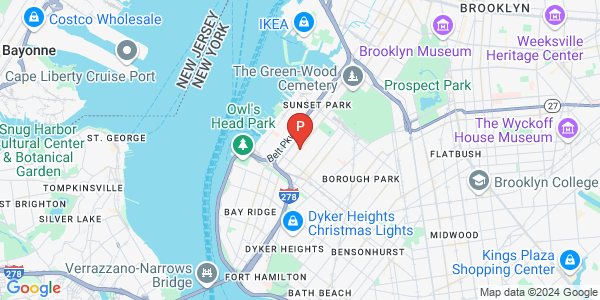

In [35]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Base URL for Google Maps Static API
base_url = 'https://maps.googleapis.com/maps/api/staticmap?'

# Define parameters for the API request
params = {
    'center': f'{finalists_df_test.get('geometry.location.lat')[0]},{finalists_df_test.get('geometry.location.lng')[0]}',  # Center of the map set to New York
    'zoom': '12',  # Zoom level
    'size': '600x300',  # Size of the map image
    'maptype': 'roadmap',  # Type of map
    'markers': f'color:red|label:P|{finalists_df_test.get('geometry.location.lat')[0]},{finalists_df_test.get('geometry.location.lng')[0]}',  # Add a marker at the specified coordinates
    'key': "api_key"  # Your API key
}

# Make the request to the API
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Display the imageli
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print("Error:", response.status_code)


Generate the locations array as a string for JavaScript. 
 This string contains coordinates for all the locations gathered from the api call

In [43]:
locations = []
for lat, lng in zip(finalists_df_test['geometry.location.lat'], finalists_df_test['geometry.location.lng']):
    locations.append(f"{{ lat: {lat}, lng: {lng} }}")

# Join all locations into a single string
locations_str = ",\n".join(locations)


HTML content with Google Maps and markers. 
 HTML content renders an interactive map

In [44]:
html_code = f"""
<!DOCTYPE html>
<html>
  <head>
    <title>Google Maps with Multiple Markers</title>
    <script src="https://maps.googleapis.com/maps/api/js?key={api_key}"></script>
    <script>
      function initMap() {{
        var map = new google.maps.Map(document.getElementById('map'), {{
          zoom: 12,
          center: {{ lat: 40.7128, lng: -74.0060 }}  // Adjust to your preferred center
        }});

        var locations = [{locations_str}];

        for (var i = 0; i < locations.length; i++) {{
          new google.maps.Marker({{
            position: locations[i],
            map: map,
            title: 'Marker ' + (i + 1)
          }});
        }}
      }}
    </script>
  </head>
  <body onload="initMap()">
    <h3>Google Maps Demo</h3>
    <div id="map" style="height: 600px; width: 100%;"></div>
  </body>
</html>
"""

# Save the HTML code to an HTML file
with open("google_map.html", "w") as file:
    file.write(html_code)


from IPython.display import IFrame

# Display the map using an IFrame
display(IFrame(src='google_map.html', width='100%', height='600px'))


**As of now, the steps have explored methods of implementation and tested various plotting techniques. The exploration of Google Maps has yielded satisfactory results, instilling confidence in proceeding with further analysis.**

**So far, the gathered data includes information about numerous places worth exploring. However, considering the limitations of time and money as an international student, the individual plans to study the data further and filter it according to their preferences, which include:**
1. **Type of place (relative to ambience, dining style, and cuisine)**
2. **Price of place**
3. **User ratings.**
4. **Opeartional Status**

In [23]:
finalists_df = pd.read_csv("dineout_finalists.csv")
finalists_df.dropna(subset=['business_status'],inplace=True,ignore_index=True)
finalists_df.head()

,business_status,formatted_address,icon,icon_background_color,icon_mask_base_uri,name,photos,place_id,price_level,rating,...,geometry.location.lat,geometry.location.lng,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,opening_hours.open_now,plus_code.compound_code,plus_code.global_code,permanently_closed
0,OPERATIONAL,"5411 5th Ave, Brooklyn, NY 11220, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,CHF Chinese Restaurant,"[{'height': 1758, 'html_attributions': ['<a hr...",ChIJNSxiNkhbwokRY35CW4SZx48,1.0,4.4,...,40.642574,-74.012773,40.643933,-74.011439,40.641234,-74.014139,False,"JXVP+2W Brooklyn, New York",87G7JXVP+2W,NaN
1,OPERATIONAL,"195 Utica Ave, Brooklyn, NY 11213, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Lakou Cafe,"[{'height': 1000, 'html_attributions': ['<a hr...",ChIJAQBvmX5cwokRA71iUETQAZ8,2.0,4.5,...,40.672015,-73.930650,40.673359,-73.929387,40.670659,-73.932087,False,"M3C9+RP Brooklyn, New York",87G8M3C9+RP,NaN
2,OPERATIONAL,"24 W 33rd St, New York, NY 10001, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Nan Xiang Xiao Long Bao-Manhattan,"[{'height': 5464, 'html_attributions': ['<a hr...",ChIJ5bXhW_pZwokRS1dCnTWL3WA,2.0,4.8,...,40.748249,-73.986480,40.749650,-73.985093,40.746950,-73.987792,False,P2X7+7C New York,87G8P2X7+7C,NaN
3,OPERATIONAL,"27-35 Jackson Ave, Long Island City, NY 11101,...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Jing Li 井禮,"[{'height': 681, 'html_attributions': ['<a hre...",ChIJ5dQtsxBZwokRbBdZUxaHzFE,2.0,4.1,...,40.748184,-73.940079,40.749462,-73.938683,40.746762,-73.941382,False,"P3X5+7X Long Island City, Queens, NY",87G8P3X5+7X,NaN
4,OPERATIONAL,"2906 172nd St, Flushing, NY 11358, United States",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Kalamaki GR,"[{'height': 2448, 'html_attributions': ['<a hr...",ChIJpWEMoRhhwokRsAVPlmRhaxM,2.0,4.5,...,40.770180,-73.793413,40.771520,-73.791967,40.768820,-73.794666,False,"Q6C4+3J Flushing, Queens, NY",87G8Q6C4+3J,NaN


Creating another attribute price_range for a binary filtering of establishments on the basis of price levels

In [24]:
# finalists_df['price_range'] = finalists_df['price_level'].apply(lambda x: 'inexpensive' if x in [1, 2] else 'expensive')
finalists_df['price_range'] = finalists_df['price_level'].apply(lambda x: 0 if x in [1, 2] else 1)

In [25]:
finalists_df.columns

Index(['business_status', 'formatted_address', 'icon', 'icon_background_color',
       'icon_mask_base_uri', 'name', 'photos', 'place_id', 'price_level',
       'rating', 'reference', 'types', 'user_ratings_total',
       'geometry.location.lat', 'geometry.location.lng',
       'geometry.viewport.northeast.lat', 'geometry.viewport.northeast.lng',
       'geometry.viewport.southwest.lat', 'geometry.viewport.southwest.lng',
       'opening_hours.open_now', 'plus_code.compound_code',
       'plus_code.global_code', 'permanently_closed', 'price_range'],
      dtype='object')

The types of establishments extracted from the data reveals that there is a presence of irrelevant place types, furhter filtering required

In [26]:
# Finding all the types of establishments present in the data
import ast
place_types = finalists_df['types'].apply(lambda x: ast.literal_eval(x)[0])
place_types = place_types.unique()
place_types

array(['restaurant', 'cafe', 'bakery', 'meal_takeaway', 'meal_delivery',
       'lodging', 'bar', 'convenience_store', 'food', 'store',
       'point_of_interest', 'bowling_alley', 'doctor',
       'real_estate_agency', 'clothing_store', 'stadium', 'casino',
       'post_office', 'book_store', 'night_club', 'hair_care',
       'shoe_store', 'grocery_or_supermarket', 'beauty_salon', 'park',
       'car_repair', 'amusement_park', 'tourist_attraction', 'university',
       'dentist', 'supermarket', 'florist', 'home_goods_store',
       'movie_theater', 'spa', 'atm', 'liquor_store', 'gym'], dtype=object)

Filtering the relevant types of establishments: **restaurant, cafe, bakery, meal_takeaway, meal_delivery,bar,liquor_store**

In [27]:
food_place_types = ['restaurant', 'cafe', 'bakery', 'meal_takeaway', 'meal_delivery','bar','liquor_store']
finalists_df['types'] = finalists_df['types'].apply(lambda x: ast.literal_eval(x)[0])

In [29]:
finalists_df['types'].head()

0    restaurant
1          cafe
2    restaurant
3    restaurant
4    restaurant
Name: types, dtype: object

After further exploration the data is ready to be filtered on the basis of user needs.
Filtering parameters currenlty considered are the following and can be easily changed
- **1. Current Status**
- **2. Price Range**
- **3. User Ratings**
- **4. Type of establishment**

In [33]:
final_dineouts_df = finalists_df[(finalists_df['business_status'] == 'OPERATIONAL') & (finalists_df['price_range'] == 0) & (finalists_df['rating'] >= 3)]

In [34]:
len(final_dineouts_df)

966

In [39]:
final_dineouts_df = final_dineouts_df[final_dineouts_df['types'].isin(food_place_types)]

In [40]:
len(final_dineouts_df)

920

In [68]:
# Generate the locations array as a string for JavaScript
locations = []
locations_info = []
for _, row in final_dineouts_df.iterrows():
    lat = row['geometry.location.lat']
    lng = row['geometry.location.lng']
    
    # Append to locations list
    locations.append(f"{{ lat: {lat}, lng: {lng} }}")
    
    # Append corresponding a and b values to location_info
    locations_info.append(f"{{ lat: {lat}, lng: {lng} }} Name: {row['name']} Type:{row['types']} Price Level:{row['price_level']} Rating:{row['rating']} ")

**This code snippet picks out 25 random locations from out filtered output.** 
 **It further prepares a location string which is made to be easily queried with the api for rendering in the API Call.**

In [74]:
import random
sample_size = min(25, len(locations_info))

# Randomly select locations
final_locations = random.sample(locations_info, sample_size)

final_locations_coords = []
for loc in final_locations:
    loc_coords = loc[:loc.index('Name')]
    final_locations_coords.append(loc_coords)

# Join all locations into a single string
locations_str = ",\n".join(final_locations_coords)

In [75]:
# Define the HTML content with Google Maps and markers
html_code = f"""
<!DOCTYPE html>
<html>
  <head>
    <title>Google Maps with 25 Filtered NY Dineout Markers</title>
    <script src="https://maps.googleapis.com/maps/api/js?key={api_key}"></script>
    <script>
      function initMap() {{
        var map = new google.maps.Map(document.getElementById('map'), {{
          zoom: 12,
          center: {{ lat: 40.7128, lng: -74.0060 }}  // Adjust to your preferred center
        }});

        var locations = [{locations_str}];

        for (var i = 0; i < locations.length; i++) {{
          new google.maps.Marker({{
            position: locations[i],
            map: map,
            title: 'Marker ' + (i + 1)
          }});
        }}
      }}
    </script>
  </head>
  <body onload="initMap()">
    <h3>Dineout Locations</h3>
    <div id="map" style="height: 600px; width: 100%;"></div>
  </body>
</html>
"""

# Save the HTML code to an HTML file
with open("google_map.html", "w") as file:
    file.write(html_code)


from IPython.display import IFrame

# Display the map using an IFrame
display(IFrame(src='google_map.html', width='100%', height='600px'))

for loc in final_locations:
    print(loc[loc.index('Name'):])

Name: Kalamaki GR Type:restaurant Price Level:2.0 Rating:4.5 
Name: Mi Tea Type:cafe Price Level:1.0 Rating:4.8 
Name: Ruby's Bar & Grill Type:bar Price Level:2.0 Rating:4.0 
Name: Lakou Cafe Type:cafe Price Level:2.0 Rating:4.5 
Name: The South of France Type:bar Price Level:2.0 Rating:4.3 
Name: Connecticut Muffin Type:bakery Price Level:1.0 Rating:4.2 
Name: Mi Casa Type:bar Price Level:1.0 Rating:3.8 
Name: Ollin 2 - 2nd Ave Type:restaurant Price Level:2.0 Rating:4.3 
Name: Roti Boti Type:restaurant Price Level:2.0 Rating:3.8 
Name: Nan Xiang Express - Hell's Kitchen, NY Type:restaurant Price Level:2.0 Rating:4.7 
Name: Ginger and Lemongrass Type:cafe Price Level:2.0 Rating:4.2 
Name: Sky Wise Lounge Type:restaurant Price Level:2.0 Rating:4.5 
Name: Mum Mediterranean Cuisine Type:meal_takeaway Price Level:1.0 Rating:4.7 
Name: Subway Type:meal_takeaway Price Level:1.0 Rating:3.6 
Name: Ocean Bay 避風塘 Type:restaurant Price Level:2.0 Rating:3.8 
Name: Canela Cafe Bar Type:cafe Price L